In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error
from pmdarima import auto_arima

In [23]:
df_all=pd.read_csv("2009_2024_dates.csv", index_col="timestamp",parse_dates=["timestamp"])
df_all.head(10)

,Unnamed: 0,Rice,Wheat,Atta (Wheat),Gram Dal,Tur/Arhar Dal,Urad Dal,Moong Dal,Masoor Dal,Sugar,...,Vanaspati (Packed),Soya Oil (Packed),Sunflower Oil (Packed),Palm Oil (Packed),Gur,Tea Loose,Salt Pack (Iodised),Potato,Onion,Tomato
timestamp,,,,,,,,,,,,,,,,,,,,,
01-01-2009,0,1510.710000,1172.86,1300.000000,2732.140000,4071.430000,3428.570000,3685.71,5058.330000,1994.290000,...,4230.57,7000.330,8123.000000,5287.000,NaN,10250.0,904.000000,362.430000,1117.860000,600.000000
02-01-2009,1,1512.500000,1260.00,1381.670000,2716.670000,4050.000000,3566.670000,3883.33,5072.000000,1955.000000,...,4333.33,6437.750,7417.250000,4611.330,NaN,8000.0,924.000000,462.500000,1166.670000,600.000000
03-01-2009,2,1518.333333,1240.00,1371.113333,2749.446667,4073.333333,3579.446667,3852.22,5105.333333,1972.666667,...,4426.42,6473.500,7459.943333,4619.110,NaN,9500.0,924.666667,453.666667,1287.780000,584.615385
04-01-2009,3,1524.166667,1220.00,1360.556667,2782.223333,4096.666667,3592.223333,3821.11,5138.666667,1990.333333,...,4519.51,6509.250,7502.636667,4626.890,NaN,11000.0,925.333333,444.833333,1408.890000,569.230769
05-01-2009,4,1530.000000,1200.00,1350.000000,2815.000000,4120.000000,3605.000000,3790.00,5172.000000,2008.000000,...,4612.60,6545.000,7545.330000,4634.670,NaN,12500.0,926.000000,436.000000,1530.000000,553.846154
06-01-2009,5,1533.330000,1266.67,1350.000000,2779.170000,4087.500000,3704.170000,3825.00,5172.000000,1996.670000,...,4510.50,6545.000,7545.330000,4664.670,NaN,12500.0,926.000000,500.830000,1558.330000,538.461538
07-01-2009,6,1530.000000,1200.00,1350.000000,2815.000000,4105.000000,3605.000000,3790.00,5172.000000,2016.000000,...,4632.80,6611.670,7562.000000,4714.670,NaN,12500.0,926.000000,462.400000,1650.000000,523.076923
08-01-2009,7,1583.750000,1300.00,1383.335000,2816.875000,4180.625000,3668.125000,3913.75,5258.000000,2006.750000,...,4553.40,5805.835,6456.000000,4289.835,NaN,12500.0,943.000000,576.450000,1681.250000,507.692308
09-01-2009,8,1637.500000,1400.00,1416.670000,2818.750000,4256.250000,3731.250000,4037.50,5344.000000,1997.500000,...,4474.00,5000.000,5350.000000,3865.000,NaN,12500.0,960.000000,690.500000,1712.500000,492.307692


In [25]:
df=df_all[["Rice","Wheat","Sugar","Potato","Onion","Tomato"]]
df

,Rice,Wheat,Sugar,Potato,Onion,Tomato
timestamp,,,,,,
01-01-2009,1510.710000,1172.86,1994.290000,362.430000,1117.86,600.000000
02-01-2009,1512.500000,1260.00,1955.000000,462.500000,1166.67,600.000000
03-01-2009,1518.333333,1240.00,1972.666667,453.666667,1287.78,584.615385
04-01-2009,1524.166667,1220.00,1990.333333,444.833333,1408.89,569.230769
05-01-2009,1530.000000,1200.00,2008.000000,436.000000,1530.00,553.846154
...,...,...,...,...,...,...
22-08-2024,3910.670000,2777.48,4161.530000,3001.790000,3838.46,3851.780000
23-08-2024,3915.680000,2768.80,4163.880000,3008.650000,3884.88,3850.470000
24-08-2024,3875.230000,2763.16,4166.350000,2997.120000,3920.79,3818.580000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5717 entries, 01-01-2009 to 26-08-2024
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rice    5717 non-null   float64
 1   Wheat   5717 non-null   float64
 2   Sugar   5717 non-null   float64
 3   Potato  5717 non-null   float64
 4   Onion   5717 non-null   float64
 5   Tomato  5717 non-null   float64
dtypes: float64(6)
memory usage: 312.6+ KB


In [29]:
df.describe()

,Rice,Wheat,Sugar,Potato,Onion,Tomato
count,5717.000000,5717.000000,5717.000000,5717.000000,5717.000000,5717.000000
mean,2584.486194,2071.239767,3473.057544,1459.241004,2032.195600,2139.521973
std,618.865531,449.934982,439.552869,550.665786,1134.921431,1191.755629
min,569.780000,962.250000,1955.000000,225.000000,593.750000,23.000000
25%,2215.970000,1782.300000,3142.993333,1105.300000,1214.820000,1400.000000
50%,2541.486667,2093.150000,3557.990000,1395.816667,1749.690000,1850.520000
75%,3050.030000,2433.170000,3805.860000,1729.770000,2421.470000,2502.400000
max,5633.000000,3600.000000,4500.000000,4500.000000,9050.290000,11597.730000


<Axes: title={'center': 'Distribution of Rice WholeSale Price in Inida(2009-2024)'}>

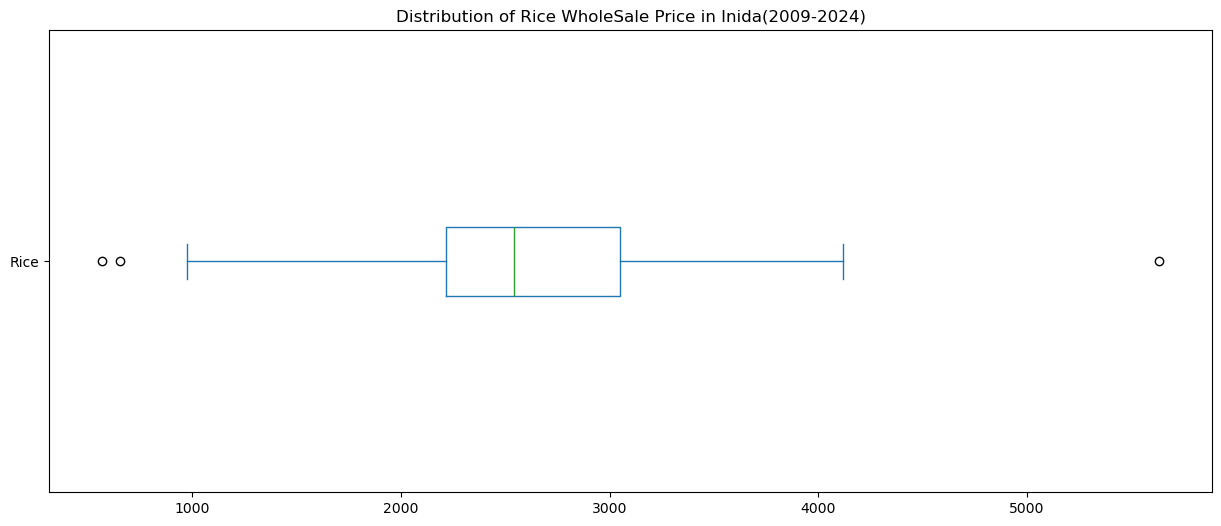

In [31]:
fig, ax = plt.subplots(figsize=(15, 6))
df["Rice"].plot(kind="box",vert=False,title="Distribution of Rice WholeSale Price in Inida(2009-2024)",ax=ax)

<Axes: title={'center': 'Distribution of Wheat WholeSale Price in Inida(2009-2024)'}>

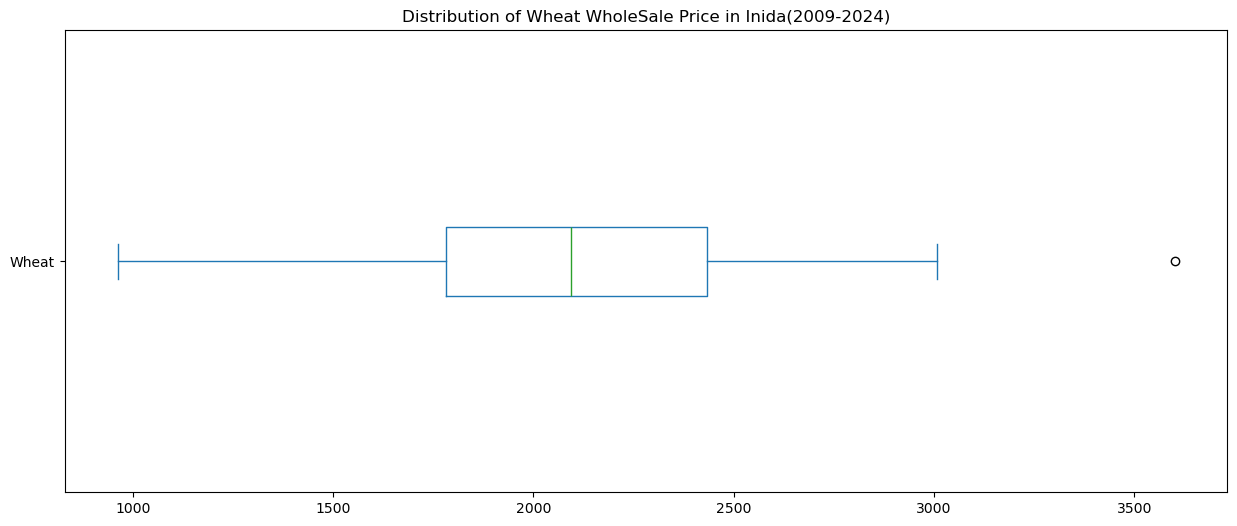

In [33]:
fig, ax = plt.subplots(figsize=(15, 6))
df["Wheat"].plot(kind="box",vert=False,title="Distribution of Wheat WholeSale Price in Inida(2009-2024)",ax=ax)

<Axes: title={'center': 'Distribution of Sugar WholeSale Price in Inida(2009-2024)'}>

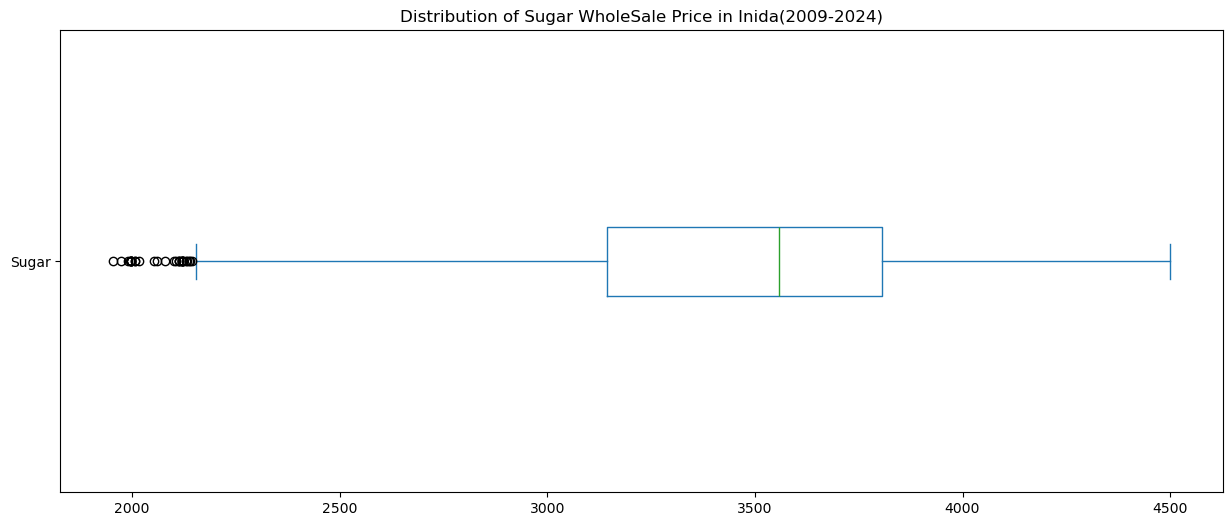

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))
df["Sugar"].plot(kind="box",vert=False,title="Distribution of Sugar WholeSale Price in Inida(2009-2024)",ax=ax)

<Axes: title={'center': 'Distribution of Potato WholeSale Price in Inida(2009-2024)'}>

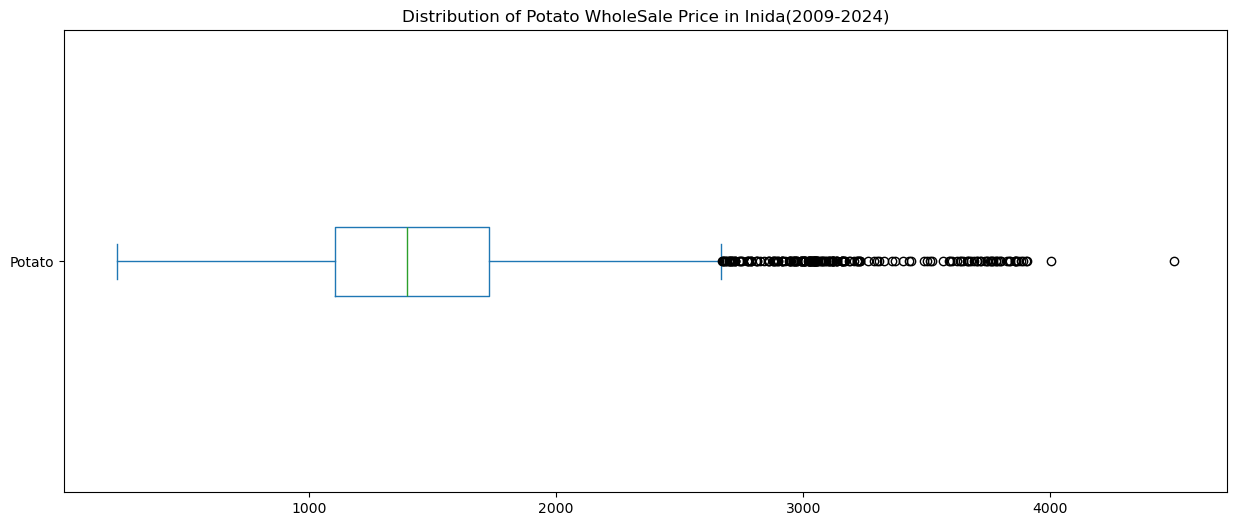

In [37]:
fig, ax = plt.subplots(figsize=(15, 6))
df["Potato"].plot(kind="box",vert=False,title="Distribution of Potato WholeSale Price in Inida(2009-2024)",ax=ax)

<Axes: title={'center': 'Distribution of Onion WholeSale Price in Inida(2009-2024)'}>

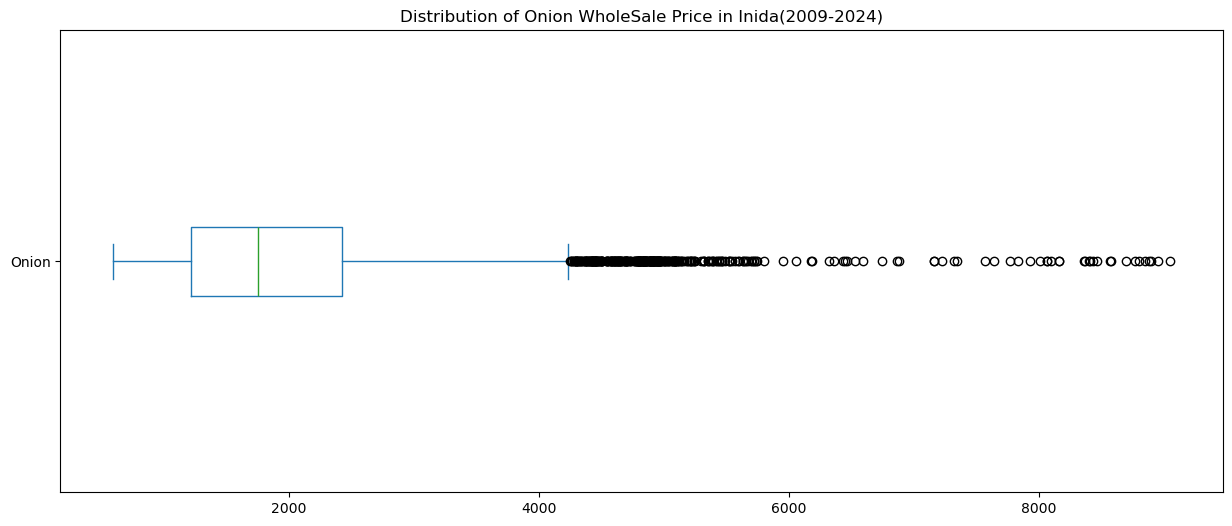

In [39]:
fig, ax = plt.subplots(figsize=(15, 6))
df["Onion"].plot(kind="box",vert=False,title="Distribution of Onion WholeSale Price in Inida(2009-2024)",ax=ax)

<Axes: title={'center': 'Distribution of Tomato WholeSale Price in Inida(2009-2024)'}>

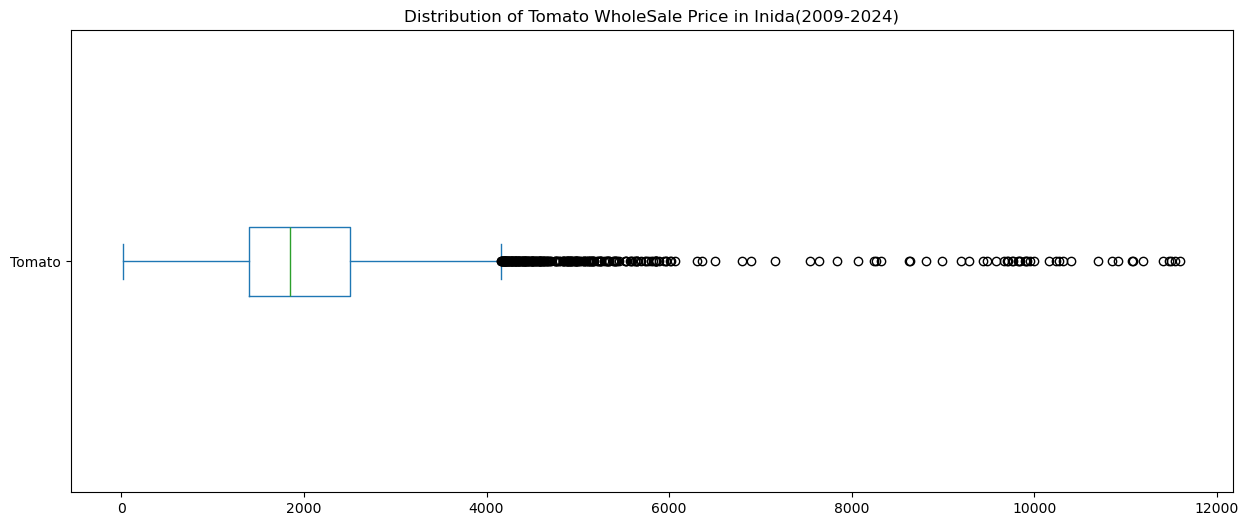

In [41]:
fig, ax = plt.subplots(figsize=(15, 6))
df["Tomato"].plot(kind="box",vert=False,title="Distribution of Tomato WholeSale Price in Inida(2009-2024)",ax=ax)

In [43]:
df.to_csv("wholesale.csv")